# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [18]:
%matplotlib inline
# import numpy and pandas
import numpy as np 
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.optimize import curve_fit
import plotly.graph_objects as go

plt.rcParams["figure.figsize"] = (8,8)

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [4]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [5]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [6]:
# Your code here:
fifa['ValueNumeric'] = pd.to_numeric([value[1:-1] for value in fifa['Value']])

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [14]:
# Your code here:
model = smf.ols('fifa["ValueNumeric"] ~ C(fifa["Position"])\
+ C(fifa["Preferred Foot"])', data = fifa).fit()
anova_table_1 = sm.stats.anova_lm(model, typ=2)
display(anova_table_1)
print(anova_table_1['PR(>F)'][0] < 0.05)
print(anova_table_1['PR(>F)'][1] < 0.05)

,sum_sq,df,F,PR(>F)
"C(fifa[""Position""])",8.971195e+06,26.0,4.117309,9.249177e-12
"C(fifa[""Preferred Foot""])",6.410584e+04,1.0,0.764952,3.817950e-01
Residual,1.498327e+09,17879.0,NaN,NaN


True
False


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [15]:
# Your code here:

model = smf.ols('fifa["ValueNumeric"] ~ C(fifa["Nationality"])', data = fifa).fit()
anova_table_2 = sm.stats.anova_lm(model, typ=2)
display(anova_table_2)
print(anova_table_2['PR(>F)'][0] < 0.05)

/Users/MarLizana/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 163, but rank is 162



,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",3.508814e+07,163.0,2.598872,1.584069e-24
Residual,1.473712e+09,17792.0,NaN,NaN


True


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [16]:
# Your code here:

fifa.isnull().sum()*100/len(fifa)
fifa_clean = fifa.dropna()
fifa_clean.isnull().sum()*100/len(fifa)

Name              0.0
Age               0.0
Nationality       0.0
Overall           0.0
Potential         0.0
Club              0.0
Value             0.0
Preferred Foot    0.0
Position          0.0
Weak Foot         0.0
Acceleration      0.0
SprintSpeed       0.0
Stamina           0.0
Strength          0.0
LongShots         0.0
Aggression        0.0
Interceptions     0.0
Positioning       0.0
Vision            0.0
Penalties         0.0
ValueNumeric      0.0
dtype: float64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [20]:
# Your code here:


TypeError: '(0        86.0
1        91.0
2        90.0
3        58.0
4        76.0
         ... 
18202    57.0
18203    39.0
18204    69.0
18205    60.0
18206    55.0
Name: SprintSpeed, Length: 18207, dtype: float64, 0        72.0
1        88.0
2        81.0
3        43.0
4        90.0
         ... 
18202    40.0
18203    43.0
18204    55.0
18205    40.0
18206    47.0
Name: Stamina, Length: 18207, dtype: float64)' is an invalid key

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [21]:
# Your code here:
X = fifa[["Potential"]]
X = sm.add_constant(X)
Y = fifa["ValueNumeric"]

model = sm.OLS(Y, X).fit()
model.summary()

/Users/MarLizana/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.

/Users/MarLizana/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

/Users/MarLizana/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

/Users/MarLizana/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Mar 2020   Prob (F-statistic):                nan
Time:                        19:30:59   Log-Likelihood:                    nan
No. Observations:               18207   AIC:                               nan
Df Residuals:                   18205   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
Potential         nan        nan        nan        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

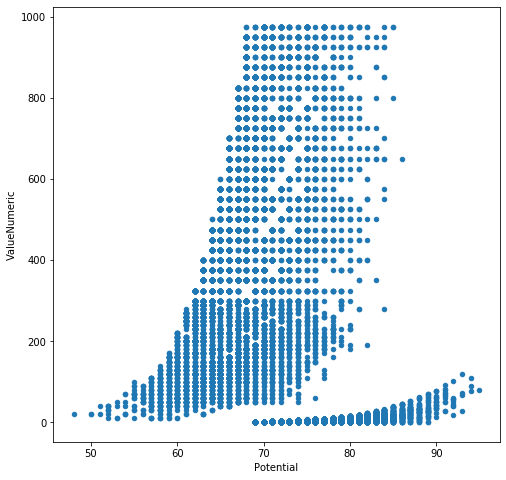

In [22]:
# Your code here:

_=fifa.plot.scatter(x="Potential", y="ValueNumeric")